## 79. Word Search

### Description

Given an $m x n$ grid of characters board and a string word, return true if word exists in the grid.

The word can be constructed from letters of sequentially adjacent cells, where adjacent cells are horizontally or vertically neighboring. The same letter cell may not be used more than once.

### Example

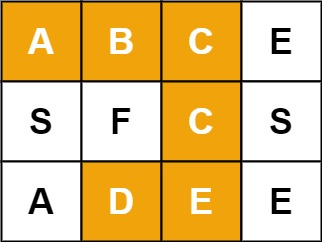

Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCCED"

Output: true

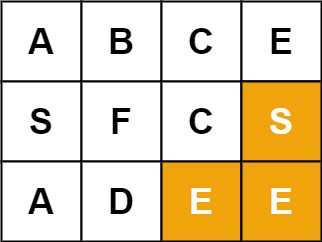

Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "SEE"

Output: true

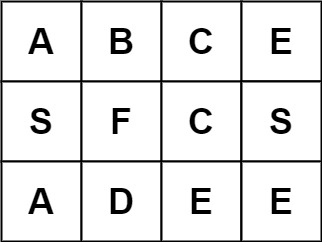

Input: board = [["A","B","C","E"],["S","F","C","S"],["A","D","E","E"]], word = "ABCB"

Output: false

### Solution (Backtrack on grid)

This is yet another problem on traversing a 2D-grid. Previously, we have encountered problems of applying DFS and BFS on a grid, this problem may look very similar to those but with slight modification. For the common part, they all require us to search something along all 4 directions; what's different is in this question, we need to search the target in certain order. Say in the first example shown above, the algorithm needs to find character 'A', then along 4 directions, it needs to find 'B' and so on. Therefore, in the backtrack function, 3 values $i, j, k$ are required, where $i, j$ denotes the location of the grid and $k$ is the index of current char in the word. The skeleton of the algorithm is a loop that iterates through each cell in the grid. For each cell, we first check whether it's in bound or it matches the char of $kth$ index in word. If not, that means we can't obtain the word with $grid(i, j)$; otherwise, we search for the next char in word along all four directions until all chars are found. 

In [2]:
def wordSearch(grid, word):
    m, n = len(grid), len(grid[0])
    
    def backtrack(i, j, k):
        if not 0 <= i <= m-1 or not 0 <= j <= n-1 or grid[i][j] != word[k]:
            return False
        
        #If finished traversing 'word', meaning there's a match in the grid
        if k == len(word) - 1:
            return True
        
        #Mark current grid as visited to avoid duplicates
        grid[i][j] = ''
        
        #Search the next char along all 4 directions
        left = backtrack(i, j-1, k+1)
        right = backtrack(i, j+1, k+1)
        up = backtrack(i-1, j, k+1)
        down = backtrack(i+1, j, k+1)
        
        grid[i][j] = word[k]
        return left or right or up or down
    
    for i in range(m):
        for j in range(n):
            if backtrack(i, j, 0):
                return True
            
    return False

### Time complexity

In the backtrack function, we apply recursive calls along 4 directions about $L$ times, where $L$ is the length of word. This results in a complexity of $O(4^L)$. In the main part, we also traverse each cell of the grid, this gives a runtime of $O(m*n)$. Thus, the overall time complexity of this algorithm is $O(mn*4^L)$.